In [67]:
import pandas as pd
import matplotlib.pyplot
import numpy.linalg as linalg
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [68]:
data = pd.read_csv('Task1 - dataset - pol_regression.csv') # Read the data from excel file 


data = data.sort_values(by=['x']) # Ordering the data by using sort_values function 

x_train = data['x']; # save the values of x in x_train
y_train = data['y'];# save the values of x in y_train

In [69]:
# x_train
# y_train

In [70]:
# Save x values into a matrix


def getPolynomialDataMatrix(x_train, degree):
    X = np.ones(x_train.shape) #generate a Matrix for saving values
    for i in range(1,degree + 1): 
        X = np.column_stack((X, x_train ** i))#use no.column_stack to insert value in different degree
    return X

In [71]:
# X

In [72]:
def pol_regression(x_train,y_train,degree):
    if degree == 0:
        coefficients = 0 # if the degree is equals to 0 the output will be a horizontal line thats mean the degree is not working yet
    else:
        X = getPolynomialDataMatrix(x_train, degree)#use getPolynomialDataMatrix function to get the matrix of degrees

        XX = X.transpose().dot(X) 
        coefficients = np.linalg.solve(XX, X.transpose().dot(y_train))# use Linalg for calculate w =(XT*X)^-1 * (XT*y)
    return coefficients

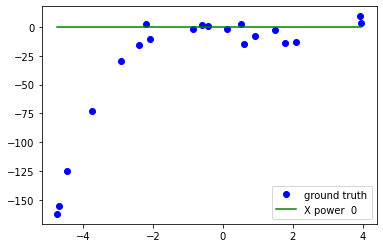

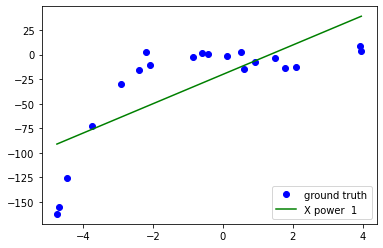

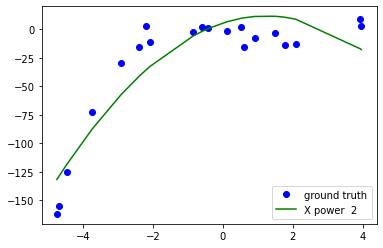

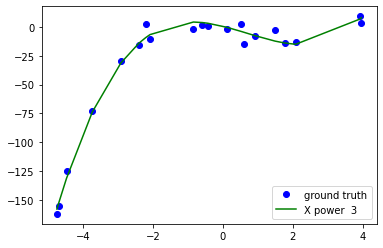

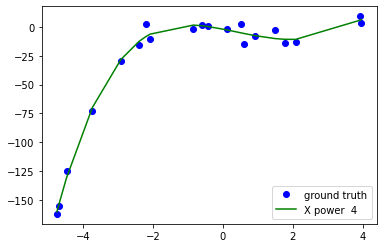

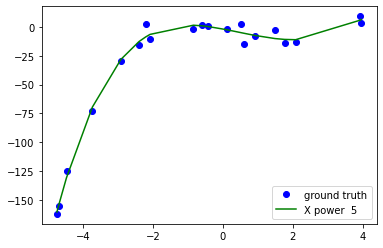

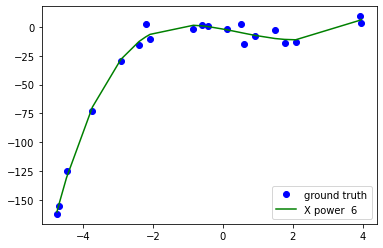

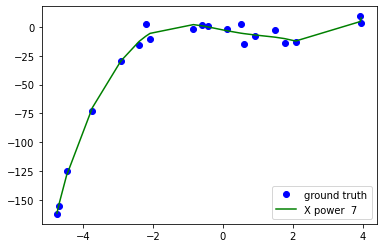

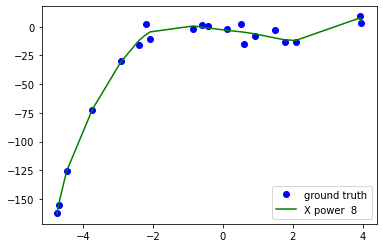

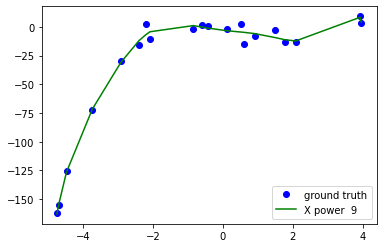

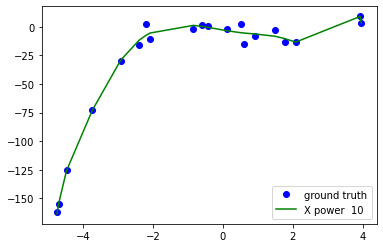

In [73]:
for degree in range(0,11): # Loop the degree from 0 to 10
    
    coefficients = pol_regression(x_train,y_train, degree) # calculate weight in current degree
    X = getPolynomialDataMatrix(x_train, degree) # get Vandermonde matrix for X
    y_pred = X.dot(coefficients) # calculate y = wX
    
    
    plt.figure() # implement a figure for plotting
    plt.plot(x_train,y_train, 'bo') # plot the ground truth
    plt.plot(x_train, y_pred, 'g') # plot the resulting polynomial in the range of [-5, 5] for the inputs x
    plt.legend(('ground truth', 'X power  %d' % degree), loc = 'lower right') # label the ground truth and relative degree line

In [74]:
def eval_pol_regression(coefficients, x, y, degree): 
    
    X = getPolynomialDataMatrix(x, i) # get Vandermonde matrix for X
    
    y_pred = X.dot(coefficients) # calculate y = wX
    
    SE = (y_pred - y)**2 # calculate square error
    MSE = SE.mean() # calculate mean square error
    RMSE = np.sqrt(MSE) # calculate square root meat square error
    
    return RMSE

In [75]:
x_train = data['x']; # get x value from data
y_train = data['y']; # get y values from data
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3) 
# split the dataset into training 70% and testing 30%

RMSEtrainSet = [] # RMSEtrainSet to save the trained RMSE
RMSEtestSet = [] # RMSEtestSet to save the tested RMSE

for i in range(0,11):
    X = getPolynomialDataMatrix(X_train, i) # get the matrix for X
    coefficients = pol_regression(X_train,y_train,i) # calculate weight in current degree
    
    RMSEtrain = eval_pol_regression(coefficients, X_train,y_train,i) # calculate rmse for training-set 
    RMSEtest = eval_pol_regression(coefficients, X_test,y_test,i)# calculate rmse for testing-set
    RMSEtrainSet.append(RMSEtrain) # append the training RMSE value into training result set
    RMSEtestSet.append(RMSEtest)# append the training RMSE value into testing result set

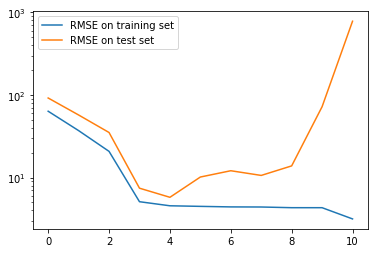

In [76]:
plt.figure(); # create an empty figure
plt.semilogy(range(0,11), RMSE_trainSet) #(RMSEtraining set)
plt.semilogy(range(0,11), RMSEtestSet) #(RMSEtesting Set)
plt.legend(('RMSE on training set', 'RMSE on test set')) # label the two lines
plt.show() # show plot